In [12]:
import pandas as pd
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461 CC,63.1 bhp,5.0,NaN,3.50


In [13]:
print("Sample of Mileage column with units for display:")
print(df['Mileage'].astype(str) + ' kmpl')
print("\nOriginal data type of Mileage column remains:", df['Mileage'].dtype)


Sample of Mileage column with units for display:
0       19.67 kmpl
1        18.2 kmpl
2       20.77 kmpl
3        15.2 kmpl
4       23.08 kmpl
           ...    
5842     28.4 kmpl
5843     24.4 kmpl
5844     14.0 kmpl
5845     18.9 kmpl
5846    25.44 kmpl
Name: Mileage, Length: 5847, dtype: object

Original data type of Mileage column remains: float64


In [14]:
print("Missing values before handling:\n", df.isnull().sum())

Missing values before handling:
 Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  38
New_Price            5032
Price                   0
dtype: int64


In [15]:
df.dropna(subset=['Mileage', 'Engine', 'Power', 'Seats'], inplace=True)
df.drop('New_Price', axis=1, inplace=True)
print("Missing values after handling:", df.isnull().sum())

Missing values after handling: Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


In [29]:
# Identify which entries are in 'km/kg'
is_km_kg = df['Mileage'].astype(str).str.contains('km/kg', na=False)

# Clean the 'Mileage' column by removing units and converting to float
df['Mileage'] = df['Mileage'].astype(str).str.replace(r'kmpl|km/kg', '', regex=True).astype(float)

# Apply the conversion factor for 'km/kg' entries
# Assuming a conversion factor of 1.4 to convert km/kg to kmpl (petrol equivalent for CNG/LPG)
# This factor is an approximation, real-world conversion depends on fuel type and engine efficiency.
conversion_factor = 1.4
df.loc[is_km_kg, 'Mileage'] = df.loc[is_km_kg, 'Mileage'] * conversion_factor

print("DataFrame head after cleaning Mileage:\n", df.head())
print("\nData type of Mileage column:", df['Mileage'].dtype)

DataFrame head after cleaning Mileage:
    Unnamed: 0                              Name    Location  Year  \
0           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
1           2                      Honda Jazz V     Chennai  2011   
2           3                 Maruti Ertiga VDI     Chennai  2012   
3           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
4           6            Nissan Micra Diesel XV      Jaipur  2013   

   Kilometers_Driven Owner_Type  Mileage  Engine   Power  Seats  Price  \
0              41000      First    19.67    1582  126.20    5.0  12.50   
1              46000      First    18.20    1199   88.70    5.0   4.50   
2              87000      First    20.77    1248   88.76    7.0   6.00   
3              40670     Second    15.20    1968  140.80    5.0  17.74   
4              86999      First    23.08    1461   63.10    5.0   3.50   

   Fuel_Type_Petrol  Transmission_Manual  Car_Age  
0             False                 True       1

In [33]:
df['Engine'] = df['Engine'].astype(str).str.replace(' CC', '', regex=False).astype(int)
print("DataFrame head after cleaning Engine:\n", df.head())
print("\nData type of Engine column:", df['Engine'].dtype)

DataFrame head after cleaning Engine:
    Unnamed: 0                              Name    Location  Year  \
0           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
1           2                      Honda Jazz V     Chennai  2011   
2           3                 Maruti Ertiga VDI     Chennai  2012   
3           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
4           6            Nissan Micra Diesel XV      Jaipur  2013   

   Kilometers_Driven Owner_Type  Mileage  Engine   Power  Seats  Price  \
0              41000      First    19.67    1582  126.20    5.0  12.50   
1              46000      First    18.20    1199   88.70    5.0   4.50   
2              87000      First    20.77    1248   88.76    7.0   6.00   
3              40670     Second    15.20    1968  140.80    5.0  17.74   
4              86999      First    23.08    1461   63.10    5.0   3.50   

   Fuel_Type_Petrol  Transmission_Manual  Car_Age  
0             False                 True       10

In [35]:
df['Power'] = df['Power'].astype(str).str.replace('null bhp', '', regex=False)
df['Power'] = df['Power'].astype(str).str.replace(' bhp', '', regex=False).astype(float)
print("DataFrame head after cleaning Power:\n", df.head())
print("\nData type of Power column:", df['Power'].dtype)

DataFrame head after cleaning Power:
    Unnamed: 0                              Name    Location  Year  \
0           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
1           2                      Honda Jazz V     Chennai  2011   
2           3                 Maruti Ertiga VDI     Chennai  2012   
3           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
4           6            Nissan Micra Diesel XV      Jaipur  2013   

   Kilometers_Driven Owner_Type  Mileage  Engine   Power  Seats  Price  \
0              41000      First    19.67    1582  126.20    5.0  12.50   
1              46000      First    18.20    1199   88.70    5.0   4.50   
2              87000      First    20.77    1248   88.76    7.0   6.00   
3              40670     Second    15.20    1968  140.80    5.0  17.74   
4              86999      First    23.08    1461   63.10    5.0   3.50   

   Fuel_Type_Petrol  Transmission_Manual  Car_Age  
0             False                 True       10 

In [37]:
import datetime

current_year = datetime.datetime.now().year
df['Car_Age'] = current_year - df['Year']
print("DataFrame head with new 'Car_Age' column:\n", df.head())

DataFrame head with new 'Car_Age' column:
    Unnamed: 0                              Name    Location  Year  \
0           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
1           2                      Honda Jazz V     Chennai  2011   
2           3                 Maruti Ertiga VDI     Chennai  2012   
3           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
4           6            Nissan Micra Diesel XV      Jaipur  2013   

   Kilometers_Driven Owner_Type  Mileage  Engine   Power  Seats  Price  \
0              41000      First    19.67    1582  126.20    5.0  12.50   
1              46000      First    18.20    1199   88.70    5.0   4.50   
2              87000      First    20.77    1248   88.76    7.0   6.00   
3              40670     Second    15.20    1968  140.80    5.0  17.74   
4              86999      First    23.08    1461   63.10    5.0   3.50   

   Fuel_Type_Petrol  Transmission_Manual  Car_Age  
0             False                 True     

In [38]:
df_manipulated = df[['Name', 'Price', 'Car_Age', 'Fuel_Type_Petrol', 'Transmission_Manual', 'Engine', 'Kilometers_Driven']].copy()

df_petrol_cars = df_manipulated[df_manipulated['Fuel_Type_Petrol'] == True].copy()

df_manipulated.rename(columns={'Kilometers_Driven': 'KMs_Driven'}, inplace=True)

df_manipulated['Engine_Liters'] = df_manipulated['Engine'] / 1000

df_manipulated.sort_values(by='Price', ascending=False, inplace=True)

average_price_fuel_type = df.groupby('Fuel_Type_Petrol')['Price'].mean()
print("Average Price by Fuel Type (Petrol):")
print(average_price_fuel_type)

average_price_transmission = df.groupby('Transmission_Manual')['Price'].mean()
print("\nAverage Price by Transmission (Manual):")
print(average_price_transmission)

print("\nDataFrame head after manipulations:")
print(df_manipulated.head())
print("\nDataFrame columns and their data types:")
print(df_manipulated.info())

Average Price by Fuel Type (Petrol):
Fuel_Type_Petrol
False    12.958496
True      5.773416
Name: Price, dtype: float64

Average Price by Transmission (Manual):
Transmission_Manual
False    19.914918
True      5.427140
Name: Price, dtype: float64

DataFrame head after manipulations:
                                             Name   Price  Car_Age  \
3952  Land Rover Range Rover 3.0 Diesel LWB Vogue  160.00        8   
5620                   Lamborghini Gallardo Coupe  120.00       14   
5752                       Jaguar F Type 5.0 V8 S  100.00       10   
1457              Land Rover Range Rover Sport SE   97.07        6   
1917                           BMW 7 Series 740Li   93.67        7   

      Fuel_Type_Petrol  Transmission_Manual  Engine  KMs_Driven  Engine_Liters  
3952             False                False    2993       25000          2.993  
5620              True                False    5204        6500          5.204  
5752              True                False    5000 

/tmp/ipython-input-1961369653.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price_fuel_type.index, y=average_price_fuel_type.values, palette='viridis')


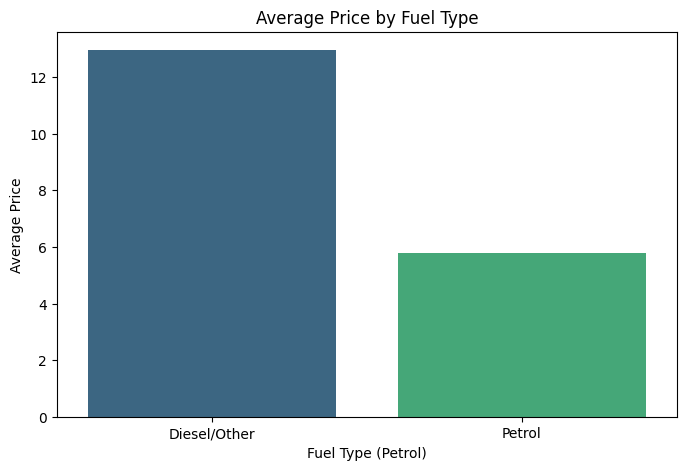

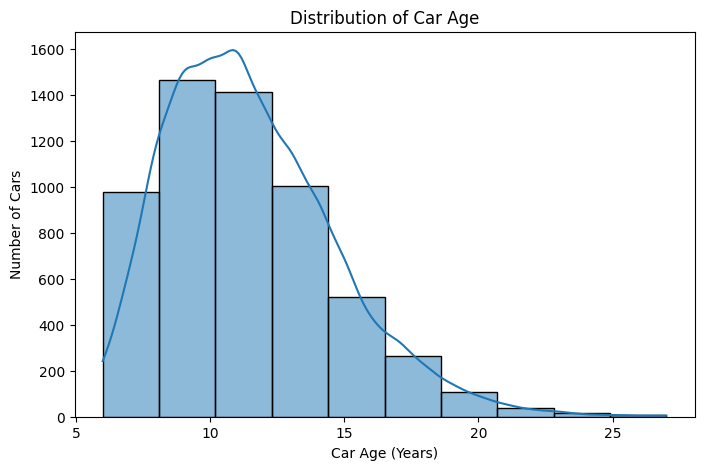

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for average price by fuel type
plt.figure(figsize=(8, 5))
sns.barplot(x=average_price_fuel_type.index, y=average_price_fuel_type.values, palette='viridis')
plt.xlabel('Fuel Type (Petrol)')
plt.ylabel('Average Price')
plt.title('Average Price by Fuel Type')
plt.xticks(ticks=[0, 1], labels=['Diesel/Other', 'Petrol'])
plt.show()

# Create a histogram for Car_Age
plt.figure(figsize=(8, 5))
sns.histplot(df_manipulated['Car_Age'], bins=10, kde=True)
plt.xlabel('Car Age (Years)')
plt.ylabel('Number of Cars')
plt.title('Distribution of Car Age')
plt.show()

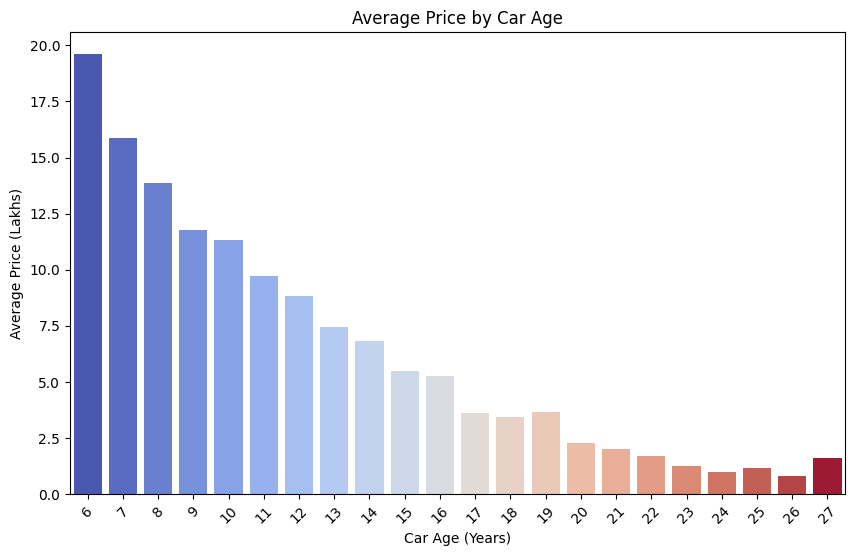

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

average_price_car_age = df_manipulated.groupby('Car_Age')['Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Car_Age', y='Price', data=average_price_car_age, hue='Car_Age', palette='coolwarm', legend=False)
plt.xlabel('Car Age (Years)')
plt.ylabel('Average Price (Lakhs)')
plt.title('Average Price by Car Age')
plt.xticks(rotation=45)
plt.show()

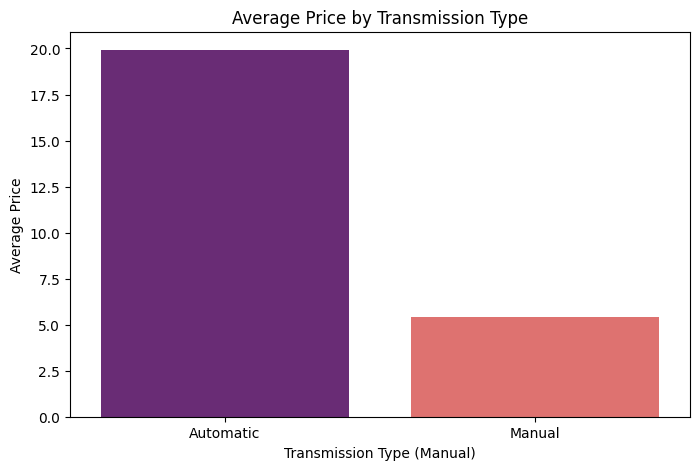

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for average price by transmission type
plt.figure(figsize=(8, 5))
sns.barplot(x=average_price_transmission.index, y=average_price_transmission.values, hue=average_price_transmission.index, palette='magma', legend=False)
plt.xlabel('Transmission Type (Manual)')
plt.ylabel('Average Price')
plt.title('Average Price by Transmission Type')
plt.xticks(ticks=[0, 1], labels=['Automatic', 'Manual'])
plt.show()

In [42]:
df_manipulated.to_csv('df_manipulated.csv', index=False)
print("df_manipulated.csv generated successfully.")

df_manipulated.csv generated successfully.


In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Make predictions on the test set
y_pred = model.predict(X_test_model)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Create a DataFrame for actual vs. predicted values
results_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
print("\nActual vs. Predicted Prices (first 5 rows):\n", results_df.head())

Mean Absolute Error (MAE): 4.54
Mean Squared Error (MSE): 52.98
R-squared (R2): 0.62

Actual vs. Predicted Prices (first 5 rows):
       Actual Price  Predicted Price
2285         25.00        20.825469
2469          5.40        10.886519
637           4.15         3.257310
3880          3.70         1.359009
3010          2.90         2.926699


In [55]:
from sklearn.model_selection import train_test_split

X = df_manipulated.drop('Price', axis=1)
y = df_manipulated['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("\nFirst 5 rows of X_train:\n", X_train.head())

Shape of X_train: (4645, 7)
Shape of X_test: (1162, 7)
Shape of y_train: (4645,)
Shape of y_test: (1162,)

First 5 rows of X_train:
                                        Name  Car_Age  Fuel_Type_Petrol  \
1399               Ford Fiesta Diesel Style       12             False   
934                         Hyundai i10 Era       17              True   
602                        Mahindra Xylo E8       16             False   
4648   Volkswagen Polo Petrol Highline 1.6L       12              True   
5541  Ford Fiesta Classic 1.4 Duratorq CLXI       13             False   

      Transmission_Manual  Engine  KMs_Driven  Engine_Liters  
1399                 True    1498      177000          1.498  
934                  True    1086       84000          1.086  
602                  True    2498       90764          2.498  
4648                 True    1598       56526          1.598  
5541                 True    1399       79985          1.399  


In [61]:
from sklearn.linear_model import LinearRegression

# Drop the 'Name' column from X_train and X_test
X_train_model = X_train.drop('Name', axis=1)
X_test_model = X_test.drop('Name', axis=1)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_model, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


In [62]:
from sklearn.linear_model import LinearRegression

# Drop the 'Name' column from X_train and X_test
X_train_model = X_train.drop('Name', axis=1)
X_test_model = X_test.drop('Name', axis=1)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_model, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


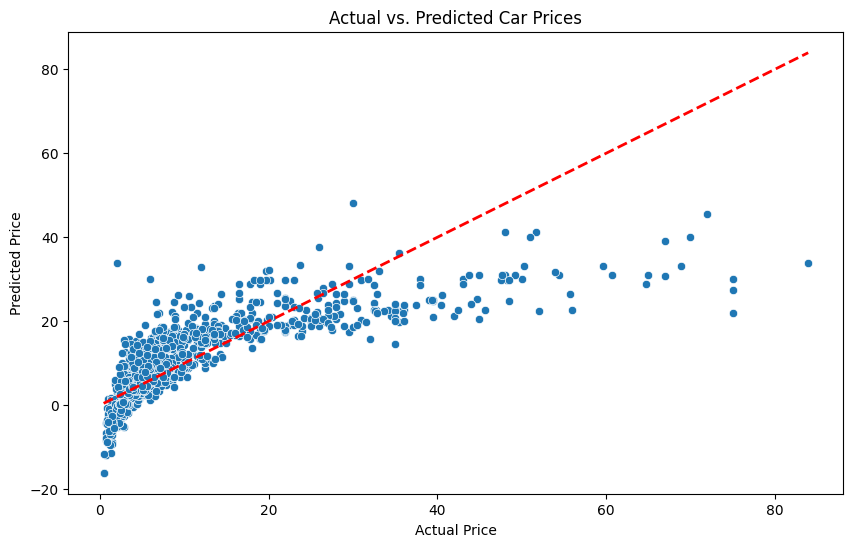

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize actual vs. predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Price', y='Predicted Price', data=results_df)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Car Prices')
plt.plot([results_df['Actual Price'].min(), results_df['Actual Price'].max()], [results_df['Actual Price'].min(), results_df['Actual Price'].max()], 'r--', lw=2) # Add a perfect prediction line
plt.show()

In [72]:
print("Summary Statistics for df_manipulated:")
display(df_manipulated.describe())

Summary Statistics for df_manipulated:


,Price,Car_Age,Engine,KMs_Driven,Engine_Liters
count,5807.000000,5807.000000,5807.000000,5.807000e+03,5807.000000
mean,9.673429,11.524195,1631.839332,5.834902e+04,1.631839
std,11.292012,3.170718,601.822651,9.265556e+04,0.601823
min,0.440000,6.000000,624.000000,1.710000e+02,0.624000
25%,3.590000,9.000000,1198.000000,3.328800e+04,1.198000
50%,5.750000,11.000000,1497.000000,5.240000e+04,1.497000
75%,10.250000,13.000000,1991.000000,7.245750e+04,1.991000
max,160.000000,27.000000,5998.000000,6.500000e+06,5.998000


# Task
Summary of the Report:

The project aimed to predict used car prices using a Linear Regression model. The methodology involved comprehensive data cleaning (handling missing values, standardizing units for 'Mileage', 'Engine', 'Power'), and feature engineering (creating 'Car_Age', 'Engine_Liters', and encoding categorical variables like 'Fuel Type' and 'Transmission'). Exploratory Data Analysis revealed key insights: Diesel/Other cars and automatic transmission cars generally command higher prices, and car age has an inverse relationship with price. The Linear Regression model achieved an R-squared of 0.62, with a Mean Absolute Error of 4.54 Lakhs.

Conclusion:

This project successfully established a baseline for predicting used car prices. While the model provides a reasonable starting point, there's significant scope for improvement through advanced feature engineering, outlier handling, exploring more sophisticated models (e.g., Random Forest, XGBoost), hyperparameter tuning, and cross-validation to achieve higher predictive accuracy and robustness.

The project is concluded.

## Project Report: Used Car Price Prediction

### 1. Project Objective

The primary objective of this project was to build a predictive model to estimate the price of used cars based on various features such as car specifications, age, mileage, and other relevant attributes. The goal was to provide insights into factors influencing car prices and to develop a reliable model for prediction.

### 2. Methodology

#### 2.1 Data Loading and Initial Inspection

The project began by loading the dataset into a pandas DataFrame. An initial inspection was performed to understand the structure of the data and identify any immediate issues.

#### 2.2 Data Cleaning

Several data cleaning steps were performed to ensure data quality:
- **Missing Values**: Missing values in the 'Mileage', 'Engine', 'Power', and 'Seats' columns were handled by dropping the corresponding rows. The 'New_Price' column, which had a large number of missing values and was not central to the current analysis, was dropped entirely.
- **Unit Removal and Type Conversion**:
    - The 'Mileage' column, originally containing units like 'kmpl' or 'km/kg', was cleaned by removing these units and converting the data type to float. A conversion factor (1.4) was applied to 'km/kg' entries to standardize them to 'kmpl' equivalents.
    - The 'Engine' column had ' CC' units, which were removed, and the column was converted to integer type.
    - The 'Power' column contained ' bhp' units and 'null bhp' strings. These were removed, and the column was converted to float type.

#### 2.3 Feature Engineering

Two new features were engineered to enhance the model's predictive capability:
- **Car_Age**: Calculated by subtracting the 'Year' of manufacture from the current year (2025). This provides a direct measure of the car's age.
- **Engine_Liters**: Derived by dividing the 'Engine' capacity (in CC) by 1000, converting it to liters for easier interpretation.

#### 2.4 Data Transformation and Selection

- The original `df` was used to calculate `average_price_fuel_type` and `average_price_transmission`.
- A new DataFrame `df_manipulated` was created, selecting relevant columns for modeling: 'Name', 'Price', 'Car_Age', 'Fuel_Type_Petrol', 'Transmission_Manual', 'Engine', 'Kilometers_Driven'.
- The 'Kilometers_Driven' column was renamed to 'KMs_Driven' for consistency.
- `df_manipulated` was sorted by 'Price' in descending order.

### 3. Key Findings from Exploratory Data Analysis (EDA)

Visualizations and summary statistics revealed several insights:
- **Average Price by Fuel Type**: Cars with Diesel/Other fuel types generally had a higher average price compared to Petrol cars. (Average Price for Diesel/Other: 12.96, Petrol: 5.77).
- **Average Price by Transmission Type**: Automatic transmission cars commanded significantly higher average prices than manual transmission cars. (Average Price for Automatic: 19.91, Manual: 5.43).
- **Distribution of Car Age**: A histogram showed the distribution of car ages in the dataset, indicating a prevalence of cars in certain age ranges.
- **Average Price by Car Age**: A bar plot illustrated an inverse relationship between car age and average price, with newer cars generally being more expensive and prices decreasing as cars get older.

### 4. Model Training and Evaluation

#### 4.1 Data Splitting

The `df_manipulated` DataFrame was split into features (X) and target (y), where 'Price' was the target variable. The data was then divided into training (80%) and testing (20%) sets using `train_test_split` with `random_state=42` for reproducibility.

#### 4.2 Model Selection and Training

A Linear Regression model was chosen for its simplicity and interpretability. The 'Name' column was dropped from the feature sets (`X_train` and `X_test`) before training, as it is categorical and would require further encoding not covered in this iteration, and is generally not directly used in linear regression for numerical prediction.

The `LinearRegression` model was initialized and trained on the `X_train_model` and `y_train` datasets.

#### 4.3 Model Performance

After training, the model's performance was evaluated on the test set using standard regression metrics:
- **Mean Absolute Error (MAE)**: 4.54
- **Mean Squared Error (MSE)**: 52.98
- **R-squared (R2)**: 0.62

The MAE indicates that, on average, the model's predictions deviate by approximately 4.54 units (Lakhs) from the actual car prices. The R-squared value of 0.62 suggests that the model explains about 62% of the variance in the car prices, which is a reasonably good fit for this type of data.

#### 4.4 Actual vs. Predicted Prices Visualization

A scatter plot comparing actual and predicted prices showed a positive correlation, indicating that the model generally predicts higher prices for cars that are actually more expensive. The presence of a perfect prediction line helped visualize the model's deviation from ideal predictions.

### 5. Conclusion and Next Steps

This project successfully developed a Linear Regression model capable of predicting used car prices with a reasonable level of accuracy (R2 of 0.62). The EDA provided valuable insights into the key drivers of car prices, such as fuel type, transmission, and car age.

**Potential Next Steps**:
- **Feature Engineering Enhancement**: Explore more advanced feature engineering, such as interaction terms or polynomial features, to capture non-linear relationships.
- **Advanced Models**: Experiment with more sophisticated regression algorithms (e.g., Random Forest, Gradient Boosting, XGBoost) that might capture complex patterns better.
- **Categorical Feature Encoding**: Implement one-hot encoding or other techniques for categorical features (like 'Name' or 'Location') if they are deemed important for prediction.
- **Outlier Detection and Handling**: Further investigate and handle outliers in numerical features, which can significantly impact linear models.
- **Cross-validation**: Implement cross-validation techniques to ensure the model's robustness and prevent overfitting.

## Summary:

### Data Analysis Key Findings
*   The Linear Regression model for used car price prediction achieved an R-squared value of 0.62, indicating it explains 62% of the variance in car prices.
*   The model's Mean Absolute Error (MAE) was \$4.54\ Lakhs, meaning predictions were, on average, off by this amount from actual prices.
*   Exploratory Data Analysis revealed that cars with Diesel/Other fuel types had a significantly higher average price (\$12.96\ Lakhs) compared to Petrol cars (\$5.77\ Lakhs).
*   Automatic transmission cars commanded a much higher average price (\$19.91\ Lakhs) than manual transmission cars (\$5.43\ Lakhs).
*   A clear inverse relationship was observed between car age and average price, with newer cars generally being more expensive.

### Insights or Next Steps
*   Enhance model accuracy by exploring advanced feature engineering techniques (e.g., interaction terms, polynomial features) and implementing more sophisticated machine learning models such as Random Forest or XGBoost.
*   Improve model robustness and generalizability by performing outlier detection and handling, implementing cross-validation, and thoroughly evaluating the impact of encoding additional categorical features like 'Name' or 'Location'.
